In [83]:
def calRange(array):
    size = len(array)
    maxInterval = 0
    interval = 0
    headinterval = 0
    for j in range(size):
        if array[j]==0:
            interval+=1
        else:
            if interval>maxInterval:
                maxInterval = interval
            if headinterval==0 and j!=0:
                headinterval= interval
            interval=0
    if headinterval+interval>maxInterval:
        maxInterval = headinterval + interval
    return size - maxInterval

test = [0,0,1,1,0,0,0,1,0,0,0,1,0,0]
print(calRange(test))
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy
import re
import random

def annotateDraw(x,y, color=None, label=None):
    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(min(x), max(x), 500)
    # Y_ = X_Y_Spline(X_)
    # plt.plot(X_,Y_,color=color, label=legend)
    
    plt.plot(x,y,color=color, label=label)
    plt.scatter(x,y,color=color)

def annotate(x,y, color, legend):
    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(min(x), max(x), 500)
    # Y_ = X_Y_Spline(X_)
    # plt.plot(X_,Y_,color=color, label=legend)
    

    plt.scatter(x,y,color=color)

def readG(id, src="data/"):
    src = "data/"

    file = src + f"data{id}.cpp"
    with open(file, 'r') as f:
        content= f.read()
    content = re.findall(r'graph::input_graph.*?;', content)
    def str2G(Hstr):
        Hstr = Hstr.replace('{', '[').replace('}', ']')

        tmp = Hstr.split(', ')
        A = eval(tmp[1])
        B = eval(tmp[2])

        size = max(max(A), max(B))+1
        G = nx.Graph()

        for i in range(len(A)):
            G.add_edge(A[i], B[i])
        return G
    
    Hgraph = content[0]
    Ggraph = content[1]

    Hstr= Hgraph.replace('graph::input_graph triangle(', '').replace(');', '')
    Gstr= Ggraph.replace('graph::input_graph square(', '').replace(');', '')
    return str2G(Hstr), str2G(Gstr)


def dataInfo(id):
    G, T = readG(id)
    # RG = nx.diameter(G)
    degree = [G.degree(node) for node in G.nodes()]
    maxTDegree = max([T.degree(n) for n in T.nodes()])
    Degree_var = np.var(degree)
    size = len(G.nodes())
    Degree_avg = 2*len(G.edges()) / len(G.nodes())
    Degree_max = max([G.degree(i) for i in G.nodes()])
    Type= None
    if maxTDegree==20:
        Type = 'Zephyr' 
    if maxTDegree==15:
        Type = 'Pegasus'
    # print(f"id: {id}, Var_num: {len(G.nodes())}, avg degree {Degree_avg: .3}, variance degree, {Degree_var:.3}")
    info = {'Var_num': size, 'Degree_avg': Degree_avg, 'Degree_variance': Degree_var, 'Degree_max':Degree_max, 'Hardware_size':len(T.nodes()), 'HardwareMaxD': maxTDegree, 'Type':Type}
    return info

def sigDigit(num, r=3):
    return float(f'{float(num):.3}')




10


In [84]:

threadIDs = ['r', 't', 'e', 's'] + [str(i) for i in range(1,7)]
def readThreadsAll(path, t, validSet=None):
    with open(f"{path}/thread{t}", 'r') as f:
        contents = f.readlines()
    failRate={}
    Time= {}
    for line in contents:
        res = line.split(' ')
        if len(res)<6:
            continue
        id = int(res[0])
        if validSet:
            if id not in validSet:
                continue
        id = f"_{t}_{id}"
        if id not in Time.keys():
            Time[id] = [0,0]
        Time[id][0] += float(res[4][:-1])
        Time[id][1] += int(res[6])
    return Time
groups = []
for threadID in threadIDs:
    base = readThreadsAll('baseMinor/examples', threadID)
    opt = readThreadsAll('optMinor/examples', threadID)
    
    group = []
    for k in opt.keys():
        if k not in base.keys():
            continue
        baseData = base[k]
        optData = opt[k]
        baseTime = baseData[0]/baseData[1] 
        optTime = optData[0]/optData[1]
        id = k
        group.append((id, sigDigit(baseTime), sigDigit(optTime) , -1))
    groups.append(group)
# for g in group5:
#     print(g)

In [85]:
from collections import OrderedDict
def parseData(data):
    id = data[0]
    info = dataInfo(id)
    Reduction = 1 - data[2]/data[1]
    newData = OrderedDict([('ID',id), ('Base (s)', data[1]), ('Opt (s)', data[2]), ('Reduction', Reduction), ('Var_num', info['Var_num']), ('Hardware_size', info['Hardware_size']), ('Degree_avg', sigDigit(info['Degree_avg'])), ('Degree_variance', sigDigit(info['Degree_variance'])),('Degree_max', info['Degree_max']), ('Type', info['Type'])])
    return newData
aftGroup = []
for g in groups:
    res = []
    for data in g:
        newData = parseData(data)
        res.append(newData)
        print(newData)
    res.sort(key=lambda a:a['Reduction'], reverse=True)
    aftGroup.append(res)


OrderedDict([('ID', '_r_0'), ('Base (s)', 16.7), ('Opt (s)', 12.0), ('Reduction', 0.281437125748503), ('Var_num', 240), ('Hardware_size', 1680), ('Degree_avg', 17.5), ('Degree_variance', 0.25), ('Degree_max', 18), ('Type', 'Zephyr')])
OrderedDict([('ID', '_r_1'), ('Base (s)', 25.4), ('Opt (s)', 15.3), ('Reduction', 0.3976377952755905), ('Var_num', 240), ('Hardware_size', 1680), ('Degree_avg', 17.5), ('Degree_variance', 0.25), ('Degree_max', 18), ('Type', 'Zephyr')])
OrderedDict([('ID', '_r_2'), ('Base (s)', 22.1), ('Opt (s)', 16.7), ('Reduction', 0.24434389140271506), ('Var_num', 240), ('Hardware_size', 1680), ('Degree_avg', 17.5), ('Degree_variance', 0.25), ('Degree_max', 18), ('Type', 'Zephyr')])
OrderedDict([('ID', '_r_3'), ('Base (s)', 24.9), ('Opt (s)', 16.2), ('Reduction', 0.3493975903614458), ('Var_num', 240), ('Hardware_size', 1680), ('Degree_avg', 17.5), ('Degree_variance', 0.25), ('Degree_max', 18), ('Type', 'Zephyr')])
OrderedDict([('ID', '_r_4'), ('Base (s)', 18.4), ('Opt (

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_1_1.cpp'

r


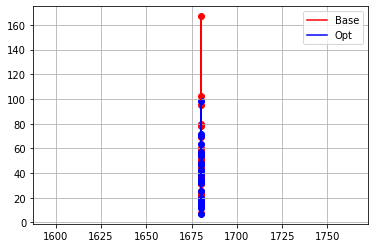

In [4]:
res = []
index = 0
print(threadIDs[index])
for g in aftGroup[index]:
    # if g['Var_num'] == 1260 and g['Type'] == 'Zephyr':
    if True:
        res.append(g)
res.sort(key = lambda a : a['Hardware_size'])
x = [a['Hardware_size'] for a in res]
yb = [a['Base (s)'] for a in res]
yo = [a['Opt (s)'] for a in res]
yrd = [(yb[i] - yo[i]) for i in range(len(yo))]
annotateDraw(x,yb,color='red', label='Base')
annotateDraw(x,yo,color='blue', label='Opt')
# annotateDraw(x, yrd, color='green', label='Base - Opt')
plt.grid()
plt.legend()

0.3796814074620136
[('_2_1', 54.8, 14.7, -1), ('_2_2', 65.1, 40.2, -1), ('_2_3', 69.3, 23.1, -1), ('_2_4', 64.8, 28.9, -1), ('_2_6', 52.3, 23.2, -1), ('_2_7', 55.9, 23.6, -1), ('_2_8', 66.9, 16.3, -1), ('_2_9', 50.8, 36.1, -1), ('_2_10', 53.5, 64.5, -1), ('_2_11', 57.2, 85.7, -1), ('_2_12', 55.5, 73.1, -1), ('_2_13', 57.3, 66.2, -1), ('_2_14', 54.5, 77.9, -1), ('_2_15', 63.5, 88.2, -1), ('_2_26', 59.2, 12.3, -1), ('_2_27', 62.5, 39.3, -1), ('_2_28', 76.8, 37.9, -1), ('_2_29', 25.1, 94.6, -1), ('_2_30', 66.3, 15.8, -1), ('_2_31', 65.1, 48.4, -1), ('_2_32', 47.5, 27.4, -1), ('_2_33', 57.7, 22.5, -1), ('_2_34', 57.1, 43.3, -1), ('_2_43', 27.5, 54.0, -1), ('_2_44', 101.0, 59.6, -1), ('_2_45', 90.6, 42.5, -1), ('_2_46', 73.0, 38.4, -1), ('_2_47', 97.7, 60.0, -1), ('_2_48', 99.8, 93.7, -1), ('_2_49', 36.0, 18.4, -1), ('_2_50', 40.6, 17.8, -1), ('_2_51', 61.5, 24.3, -1), ('_2_52', 92.2, 97.3, -1), ('_2_53', 95.7, 124.0, -1), ('_2_54', 83.9, 112.0, -1), ('_2_55', 91.2, 53.8, -1), ('_2_56', 67.

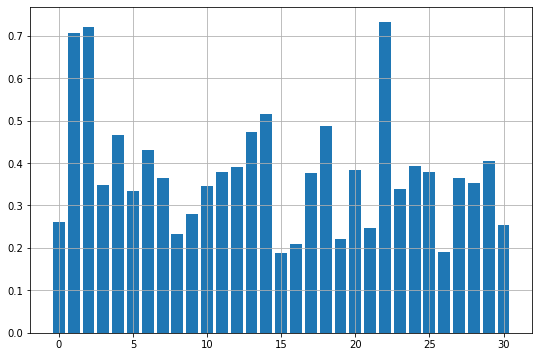

In [87]:
index = threadIDs.index('s')
svalues = [(a[1]-a[2])/ a[1] for a in groups[index]]
svalues = list(filter(lambda x:x>0.1, svalues))
x = list(range(len(svalues)))
print(sum(svalues) / len(svalues))
plt.rcParams["figure.figsize"] = (9,6)
plt.bar(x,svalues)
plt.grid()
print(groups[5])

t
_t_19 17.0 17.616580310880824
_t_22 17.0 15.217391304347816
_t_20 17.0 14.110429447852768
_t_24 17.0 13.612565445026181
_t_21 17.0 12.921348314606739
_t_23 17.0 12.50000000000001
_t_25 17.1 24.15630550621669
_t_10 24.1 18.067226890756306
_t_11 24.1 16.464891041162222
_t_12 24.1 16.216216216216218
_t_9 24.1 14.516129032258075
_t_2 30.3 16.35338345864662
_t_3 30.3 12.50000000000001
_t_5 35.8 41.17032392894462
_t_8 35.8 23.79912663755458
_t_7 35.8 17.420212765957444
_t_4 35.8 16.352201257861644
_t_6 35.8 6.940874035989708
_t_13 44.4 3.0303030303030165
_t_16 47.8 1.8181818181818077
_t_17 48.4 24.812030075187973
_t_14 48.4 18.625000000000004
_t_18 48.4 14.827586206896559
23 points
avg ratio: 16.219491596732517


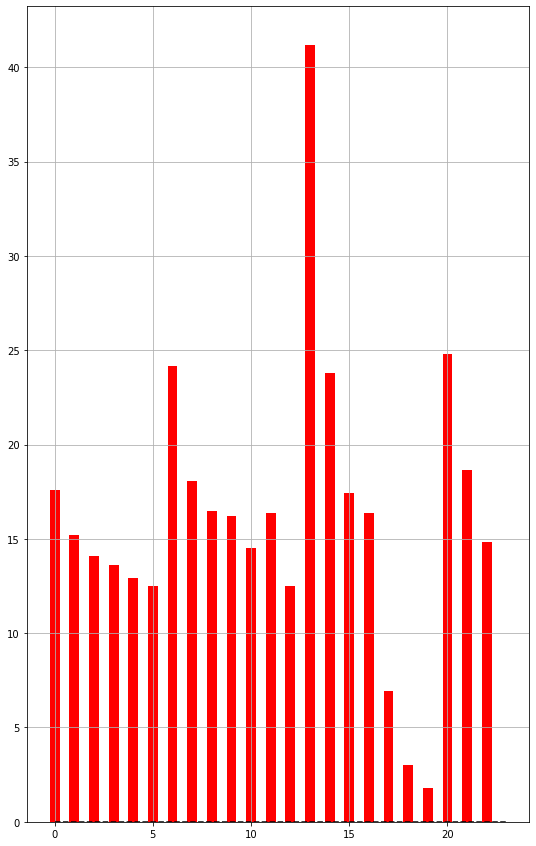

In [42]:
TimeRatio = []
index = 1
print(threadIDs[index])
group = aftGroup[index]
group.sort(key=lambda a:a['Degree_avg'], reverse=False)
for data in group:
    if data['Type']=="Pegasus":
        continue
    r = data['Reduction'] * 100

    TimeRatio.append((data['Degree_avg'], r))
    print(data['ID'], data['Degree_avg'], r)

print(f"{len(TimeRatio)} points")
TimeRatio.sort(key=lambda a:a[0])
# for t in TimeRatio:
#     print(t)
x = [i for i in range(len(TimeRatio))]
# x = [t[0] for t in TimeRatio]
values = np.array([a[1] for a in TimeRatio])
print(f"avg ratio: {sum(values) / len(values)}")
threshold = 0
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (9,6)
width = 0.5
plt.bar(x, below_threshold, width, color="g")
plt.bar(x, above_threshold, width, color="r",
        bottom=below_threshold)
# plt.ylim((0.5,2))
# horizontal line indicating the threshold
plt.plot([0., len(x)], [threshold, threshold], "k--")

plt.grid()
plt.savefig("time.pdf")

In [88]:
from functools import reduce
alldata = reduce(lambda a,b : a+b, groups)
alldata = list(filter(lambda a : a[1]>a[2]*1.1, alldata))
print(len(alldata))
print(alldata[56])


210
('_s_21', 47.9, 29.8, -1)


0
1
2
3
4


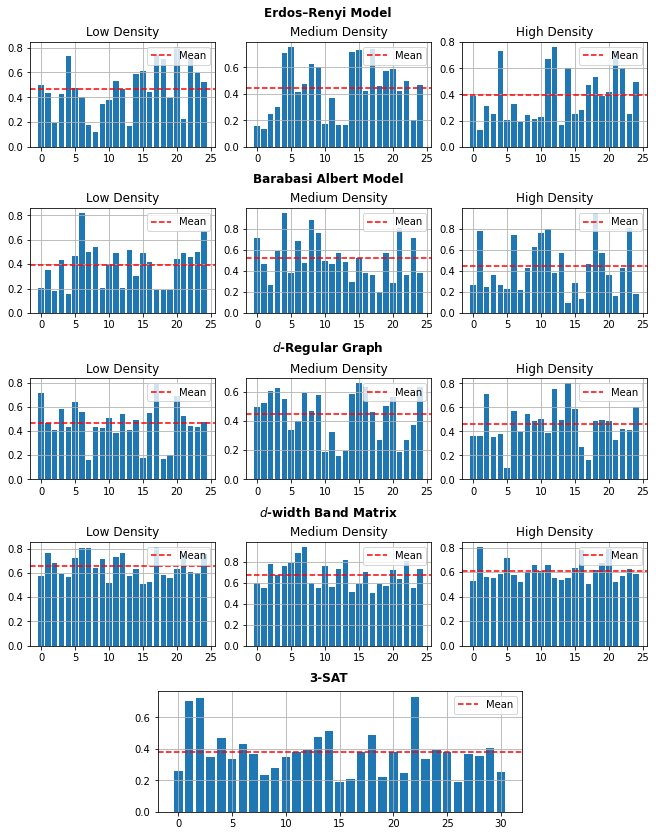

In [120]:
# create 3x1 subplots
fig, axs = plt.subplots(nrows=5, ncols=1, constrained_layout=True)
fig.set_figheight(11.5)
fig.set_figwidth(9)
# fig.suptitle('Figure title')
plt.rcParams["figure.figsize"] = (9,15)

# clear subplots
for ax in axs:
    ax.remove()

# add subfigure per subplot
gridspec = axs[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

kinds = ['Erdos–Renyi Model', 'Barabasi Albert Model', r'$d$-Regular Graph', r'$d$-width Band Matrix', '3-SAT']
titles = ['Low Density', 'Medium Density', 'High Density']

for row, subfig in enumerate(subfigs):
    subfig.suptitle(kinds[row], weight='bold')
    # create 1x3 subplots per subfig
    print(row)
    if row<4:
        axs = subfig.subplots(nrows=1, ncols=3)
        for col, ax in enumerate(axs):
            ax.grid()
            tocheck = alldata
            
            if row==3:
                tocheck = list(filter(lambda a:(a[1]-a[2]) / a[1] > 0.5, alldata))
            datas = random.sample(tocheck, 25)    
            svalues = [(a[1]-a[2]) / a[1] for a in datas]
            x = list(range(len(svalues)))
            ax.bar(x,svalues)
            ax.set_title(titles[col])
            ymean = sum(svalues)/len(svalues)
            ax.axhline(ymean, label='Mean', linestyle='--', color='red')
            legend = ax.legend(loc='upper right')
    else:
        blank = 0.2
        axs = subfig.subplots(nrows=1, ncols=3, width_ratios=[blank, 1-2*blank, blank])
        for col, ax in enumerate(axs):
            if col==0 or col==2:
                ax.axis('off')
                continue
            index = threadIDs.index('s')
            svalues = [(a[1]-a[2])/ a[1] for a in groups[index]]
            svalues = list(filter(lambda x:x>0.1, svalues))
            x = list(range(len(svalues)))
            ax.bar(x,svalues)
            ymean = sum(svalues)/len(svalues)
            ax.axhline(ymean, label='Mean', linestyle='--', color='red')
            ax.grid()
            legend = ax.legend(loc='upper right')

plt.savefig('time.pdf')